# A dataset from Twitter: undirected graph

http://networkrepository.com/rt-pol.php

An undirected graph


In [1]:
from statsmodels.distributions.empirical_distribution import ECDF
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

In [9]:
twitter=nx.read_edgelist('data/rt-pol.txt',delimiter=',',data=[('time',float)])
print('Numero di nodi: {}'.format(twitter.order()))
print('Numero di archi: {}'.format(twitter.size()))
nodes=list(twitter.nodes())
print(nodes[1])
print(twitter[nodes[1]])

Numero di nodi: 18470
Numero di archi: 48053
7349
{'12464': {'time': 1286836003.0}, '17337': {'time': 1286126973.0}, '7635': {'time': 1286836347.0}, '8888': {'time': 1285529280.0}, '9691': {'time': 1286814408.0}, '10363': {'time': 1286124914.0}, '9198': {'time': 1286130476.0}, '16907': {'time': 1284563918.0}, '11107': {'time': 1286814297.0}, '10722': {'time': 1286815124.0}, '17890': {'time': 1287729948.0}, '770': {'time': 1284828036.0}, '1247': {'time': 1286124703.0}, '15011': {'time': 1286810255.0}, '6550': {'time': 1288578714.0}, '4724': {'time': 1284564085.0}, '4544': {'time': 1286810979.0}, '5770': {'time': 1284739718.0}, '1213': {'time': 1286087683.0}, '7446': {'time': 1286747346.0}, '9463': {'time': 1286814346.0}, '7733': {'time': 1287276983.0}, '2695': {'time': 1286130165.0}, '2506': {'time': 1286292851.0}, '3128': {'time': 1286896227.0}, '12241': {'time': 1284886258.0}, '12252': {'time': 1284827973.0}, '675': {'time': 1287376383.0}, '4224': {'time': 1288578217.0}, '14392': {'ti

In [10]:
# underscore. It is used to ignore values, given not using that in future code.
with open('data/example_underscore.txt') as f:
    #il file è:
    #12464,7349,1286901355,4
    #6820,12569,1287988962,5
    for line in f:
        source, destination, _, _= line.strip().split(',')
        print(source,destination,_,_)
        print(source,destination,_)
        print(source,destination)

12464 7349 4 4
12464 7349 4
12464 7349
6820 12569 5 5
6820 12569 5
6820 12569


In [11]:
twitter = nx.Graph()
with open('data/rt-pol.txt') as f:
    for line in f:
        source, destination, _= line.strip().split(',') #nodes are strings
        source, destination, _ = list(map(int,line.strip().split(','))) 
        # map (function, iterator) applies the function to each item of an iterable  
        #nodes are int 
        twitter.add_edge(int(source), int(destination))
print('Numero di nodi: {}'.format(twitter.order()))
print('Numero di archi: {}'.format(twitter.size()))
print(twitter[12464])
#print(twitter['12464'])


Numero di nodi: 18470
Numero di archi: 48053
{7349: {}, 9864: {}, 5776: {}, 8096: {}, 7340: {}, 3648: {}, 18099: {}, 8719: {}, 4682: {}, 13445: {}, 13780: {}, 3348: {}, 9742: {}, 2103: {}, 16723: {}, 1616: {}, 15289: {}, 12108: {}, 9279: {}, 12149: {}, 6412: {}, 11590: {}, 5641: {}, 3278: {}, 14108: {}, 12710: {}, 3033: {}, 6940: {}, 17586: {}, 17527: {}, 1544: {}, 9891: {}, 11837: {}, 1857: {}, 17319: {}, 14396: {}, 15966: {}, 7720: {}, 14759: {}, 14636: {}, 13053: {}, 11488: {}, 6289: {}, 5010: {}, 5879: {}, 5416: {}, 7287: {}, 6514: {}, 6072: {}, 17799: {}, 2196: {}, 13794: {}, 4899: {}, 16281: {}, 17504: {}, 15389: {}, 12051: {}, 15407: {}, 4644: {}, 9659: {}, 5643: {}, 17338: {}, 10216: {}, 10488: {}, 16738: {}, 12749: {}, 8614: {}, 15315: {}, 6920: {}, 4141: {}, 7871: {}, 8936: {}, 4696: {}, 3137: {}, 716: {}, 17206: {}, 16890: {}, 18062: {}, 9017: {}, 18466: {}, 17861: {}, 1363: {}, 3247: {}, 17744: {}, 7994: {}, 15714: {}, 4481: {}, 16010: {}, 6865: {}, 17960: {}, 152: {}, 1461

In [12]:
density = nx.density(twitter)
print('Density: {}'.format(density))

Density: 0.00028173462530740065


## Degree analysis

In [13]:
degree = list(dict(twitter.degree()).values())

In [14]:
print('Mean degree: {}'.format(np.mean(degree)))
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Mean degree: 5.2033567948023824
Standard deviation: 16.700531508711194
Median: 1.0
Min: 1
Max: 786


### ECDF in linear e logscale

Text(0,0.5,'ECDF Facebook')

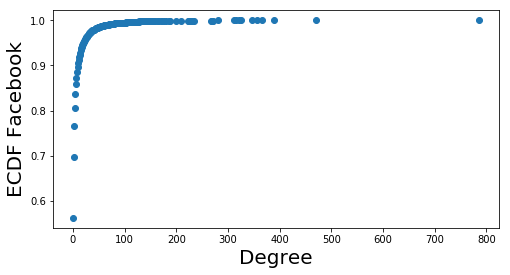

In [15]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Facebook', size = 20)

Text(0,0.5,'ECDF Facebook')

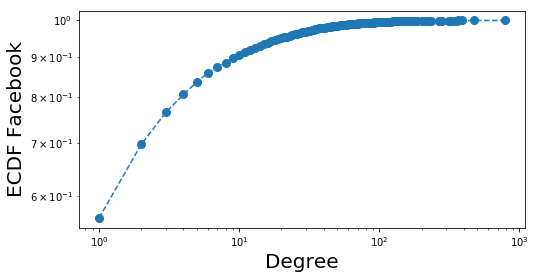

In [16]:
# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Facebook', size = 20)

Text(0,0.5,'ECCDF Facebook')

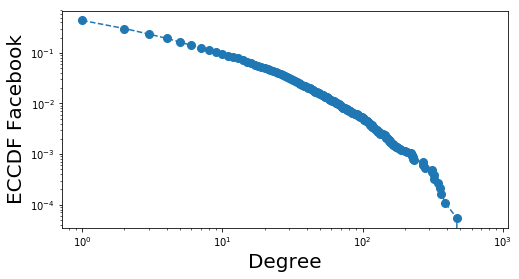

In [17]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF Facebook', size = 20)

In [27]:
p = density

In [29]:
random_graph = nx.fast_gnp_random_graph(twitter.order(),p)

In [20]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 18470
Number of links: 48204


In [21]:
random_degree = list(dict(random_graph.degree()).values())

Text(0,0.5,'ECCDF')

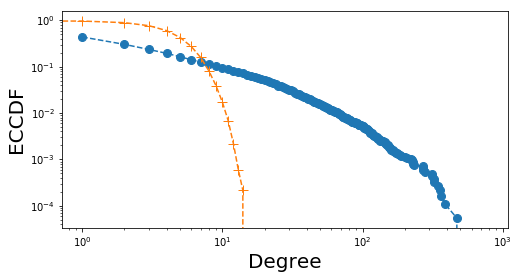

In [22]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)


# Hubs


In [23]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

67.0


In [24]:
hub_nodi = [k for k,v in dict(twitter.degree()).items() if v>= percentile_99]

In [25]:
print(len(hub_nodi))
print(list(hub_nodi))

190
[12464, 6820, 4336, 16397, 17673, 5153, 9864, 5425, 1195, 12800, 17936, 13256, 14498, 17521, 9108, 4682, 790, 654, 9691, 13300, 1126, 11837, 18099, 1888, 701, 6558, 5372, 13643, 5677, 13652, 7635, 4949, 10078, 2624, 13775, 1379, 3076, 8691, 1490, 13014, 12619, 7036, 4075, 10255, 6864, 18215, 12750, 9868, 10391, 14393, 17445, 3630, 9392, 8208, 4319, 3313, 5461, 12339, 12033, 15727, 7458, 7720, 1473, 3551, 7406, 18416, 11211, 11833, 11827, 13794, 10790, 11594, 12280, 11805, 9419, 1438, 14025, 10854, 1247, 11342, 5770, 5008, 5776, 16143, 10990, 15011, 6213, 8435, 8675, 15966, 5509, 3167, 6105, 8556, 300, 14555, 3337, 15078, 3731, 7827, 13111, 6683, 7916, 3339, 9581, 2982, 12937, 11330, 7632, 15377, 3081, 2759, 7367, 2280, 8190, 7456, 3059, 16281, 3109, 14786, 4601, 18139, 11804, 12356, 675, 14584, 17798, 4066, 10005, 9463, 8796, 9811, 16261, 12602, 11865, 1141, 7770, 4544, 14729, 14749, 6129, 7854, 9310, 764, 11776, 2402, 5010, 15592, 9942, 6222, 10349, 14358, 8888, 11674, 4998, 2188,

In [34]:
# connectivity
print(nx.is_connected(twitter))
print(nx.number_connected_components(twitter))

True
1


In [36]:
#transitivity
transitivity=nx.transitivity(twitter)
print(transitivity)


0.026800979372480153
